We often wonder how these recommendations engine work and what algorithm do they use ? 
Is it solely based on a day's activity or a batch of certain days, moths or years ? 

But before that, some of you may wonder what is this recommendation engine. 
Ah well,have you noticed how the Youtube videos on your Home page appear ? 
Or the Friend Suggestions receieved on Facebook ? 
And the recently popular, Instagram recommendation of following Narendra Modi to the comedian of EIC Atul Khatri.
These are just a few examples of recommendation engines. 
Based on these, just imagine, what if they provided recommendations such as safety tips , health tips and much more. What a wonderful world it would be !

**Recommendation engines discover patterns from your data and based on that provides suggestions to you.**

***The common two types of recommendation engines are : 
1) Collaborative Filtering 
2) Content based ***

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/movie-lens-small-latest-dataset/movies.csv
/kaggle/input/movie-lens-small-latest-dataset/tags.csv
/kaggle/input/movie-lens-small-latest-dataset/links.csv
/kaggle/input/movie-lens-small-latest-dataset/README.txt
/kaggle/input/movie-lens-small-latest-dataset/ratings.csv


In [2]:
import pandas as pd
links = pd.read_csv("../input/movie-lens-small-latest-dataset/links.csv")
movies = pd.read_csv("../input/movie-lens-small-latest-dataset/movies.csv")
ratings = pd.read_csv('../input/movie-lens-small-latest-dataset/ratings.csv')
tags = pd.read_csv("../input/movie-lens-small-latest-dataset/tags.csv")

In [3]:
# Let's have a peek at ratings 
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df = pd.merge(ratings, movies, on='movieId')


In [6]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
df.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [8]:
#Sorting the data 
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [9]:
#Calculate the number of ratings each movie got 
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [10]:
ratings_cnt = pd.DataFrame(df.groupby('title')['rating'].mean())

In [11]:
#Add number of ratings as well 
ratings_cnt['ratings_count'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [12]:
ratings_cnt.head()

,rating,ratings_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


***Data Visualization***

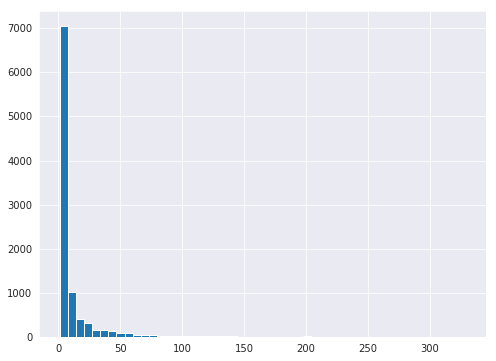

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_cnt['ratings_count'].hist(bins=50)


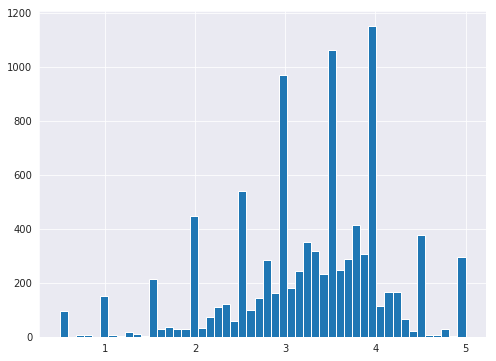

In [14]:
#Check on average ratings 

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_cnt['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

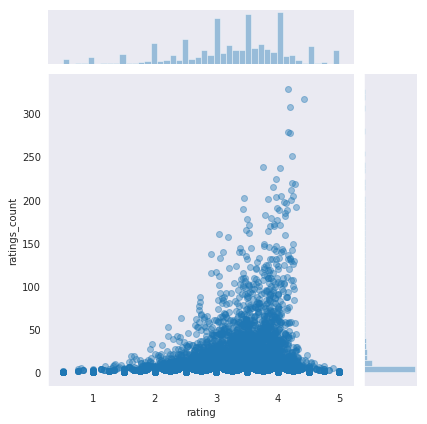

In [15]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='ratings_count', data=ratings_cnt, alpha=0.4)


In [16]:
user_rating = df.pivot_table(index='userId' ,columns = 'title' , values ='rating')
user_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
summer_ratings = user_rating['(500) Days of Summer (2009)']
summer_ratings.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: (500) Days of Summer (2009), dtype: float64

In [18]:
movies_like_summer = user_rating.corrwith(summer_ratings)
corr_summer = pd.DataFrame(movies_like_summer, columns = ['Correlation'])
corr_summer.dropna(inplace = True)
corr_summer.head()

,Correlation
title,
"'burbs, The (1989)",0.997176
(500) Days of Summer (2009),1.000000
*batteries not included (1987),0.944911
10 Cloverfield Lane (2016),0.383713
10 Things I Hate About You (1999),0.344985


In [19]:
corr_summer.sort_values('Correlation' , ascending = False).head(10)

,Correlation
title,
Red Rock West (1992),1.0
Think Like a Man (2012),1.0
"Batman: The Dark Knight Returns, Part 1 (2012)",1.0
"Nightmare on Elm Street, A (1984)",1.0
"Crush, The (1993)",1.0
The Shape of Water (2017),1.0
The Spectacular Now (2013),1.0
"Fabulous Baker Boys, The (1989)",1.0
Newsies (1992),1.0


In [20]:
corr_summer = corr_summer.join(ratings_cnt['ratings_count'])
corr_summer.head()

,Correlation,ratings_count
title,,
"'burbs, The (1989)",0.997176,17
(500) Days of Summer (2009),1.000000,42
*batteries not included (1987),0.944911,7
10 Cloverfield Lane (2016),0.383713,14
10 Things I Hate About You (1999),0.344985,54


In [21]:
corr_summer[corr_summer['ratings_count']>50].sort_values('Correlation', ascending=False).head()

,Correlation,ratings_count
title,,
Star Trek II: The Wrath of Khan (1982),0.981991,62
"Piano, The (1993)",0.944911,61
Desperado (1995),0.891042,66
Dances with Wolves (1990),0.879955,164
"Crow, The (1994)",0.857493,64


Thus, we made our first Recommendation Engine !